# LSHTM Reff comparisons

Here I compare the LSHTM Reff estimates produced by Price et al at different time points.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')
from datetime import datetime as dt
from Reff_functions import *
from Reff_constants import *

In [62]:
df_R_old = read_in_Reff()
    
df_L_R = read_in_LSHTM()
df_cases = read_in_cases(case_file_date=['20Jul','0930'])

In [63]:
df_L_R

,type,date,bottom,top,lower,upper,median,mean,std,prob_control,mean_window,sd_window,confidence,date_onset,state,date_of_analysis
0,nowcast,2020-02-17,0.289887,8.018801,0.723285,2.314665,1.846728,2.524982,2.335627,0.250000,3.500000,1.538968,1.000000,2020-02-22,WA,2020-04-26
1,nowcast,2020-02-18,0.633154,3.399798,0.730522,1.880467,1.522885,1.662922,0.923230,0.333333,3.000000,1.438390,1.000000,2020-02-23,WA,2020-04-26
2,nowcast,2020-02-19,0.026270,2.896533,0.096669,1.053035,0.981646,1.378551,1.246620,0.500000,4.000000,2.153528,1.000000,2020-02-24,WA,2020-04-26
3,nowcast,2020-02-20,0.021973,2.167481,0.115386,0.730780,0.690206,0.988095,1.198806,0.716667,3.833333,2.123630,1.000000,2020-02-25,WA,2020-04-26
4,nowcast,2020-02-21,0.038548,3.079923,0.038548,0.771794,0.752472,1.218184,1.213984,0.587500,4.312500,2.059454,0.999999,2020-02-26,WA,2020-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,nowcast,2020-07-03,0.335155,1.032422,0.484713,0.752499,0.641686,0.673346,0.222352,0.913413,1.947948,1.541398,0.777736,2020-07-08,NSW,2020-07-16
2255,nowcast,2020-07-04,0.377372,1.132724,0.526637,0.821673,0.720021,0.753190,0.239839,0.850050,1.947948,1.541398,0.721748,2020-07-09,NSW,2020-07-16
2256,nowcast,2020-07-05,0.434843,1.292793,0.585349,0.926001,0.829955,0.871006,0.276024,0.716416,1.947948,1.541398,0.653490,2020-07-10,NSW,2020-07-16
2257,nowcast,2020-07-06,0.526545,1.578843,0.691363,1.096180,0.985870,1.041906,0.339545,0.517618,1.947948,1.541398,0.571331,2020-07-11,NSW,2020-07-16


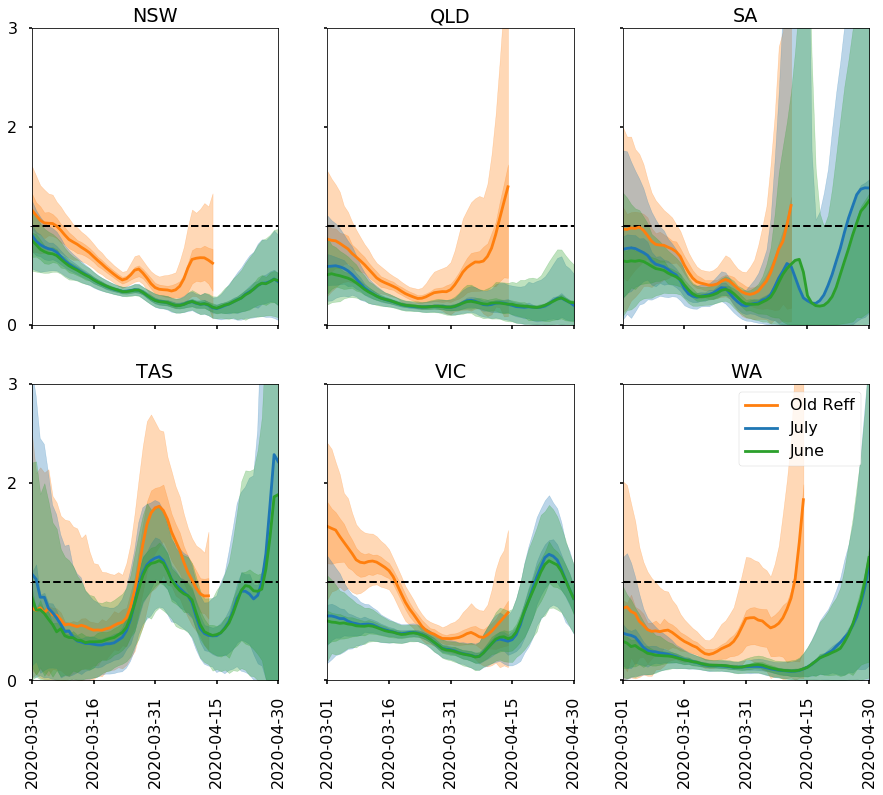

In [64]:
#plot each estimate
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-30')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_R_old.loc[(df_R_old.state==state) & (df_R_old.date.isin(date_filter))]
    
    df_april = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-16')&(df_L_R.state==state)]
    df_april = df_april.loc[df_april.date.isin(date_filter)]
    
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-06-28')&(df_L_R.state==state)]
    df_june = df_june.loc[(df_june.date.isin(date_filter))]
    
    plot_dfs ={
        'Old Reff':df_state,
        'July': df_april,
        'June':df_june,
    }
    colors = {
        'Old Reff':'C1',
        'July': 'C0',
        'June':'C2',
        
    }
    
    for label, df in plot_dfs.items():
        #plot old estimate
        ax[row,col].plot(df.date, df['median'], label=label,color=colors[label])
        ax[row,col].fill_between(df.date, df['bottom'], df['top'],color=colors[label], alpha=0.3)
        ax[row,col].fill_between(df.date, df['lower'], df['upper'],color=colors[label], alpha=0.3)


    
    
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    ax[row,col].xaxis.set_major_locator(plt.MaxNLocator(4))
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
    
plt.legend()
plt.show()

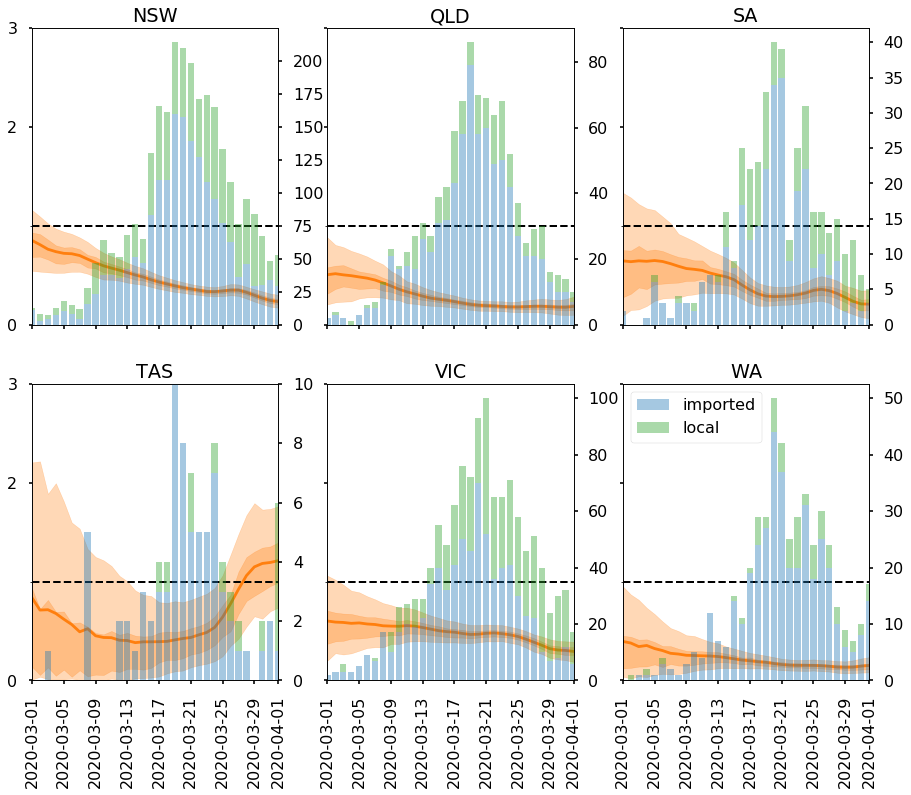

In [65]:
## plot cases over the top of Reff
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-01')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_cases.loc[(state)]

    df_state = df_state.loc[date_filter[0]:date_filter[-1]]
    #print(df_state.index)
    #df_state.index = pd.DatetimeIndex(df_state.index)
    
    #fill missing dates
#
    #df_state.index = df_state.reindex(date_filter, fill_value=0)
    df_state= df_state.asfreq('D')
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-06-28')&(df_L_R.state==state)]
    df = df_june.loc[(df_june.date.isin(date_filter))]
    

    #plot new estimate
    ax[row,col].plot(df.date, df['median'], label='June Reff',color='C1')
    ax[row,col].fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
    ax[row,col].fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
    ax2 = ax[row,col].twinx()
    ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4, label='imported')
    ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4, label='local')
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    
        
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
plt.legend()
plt.show()

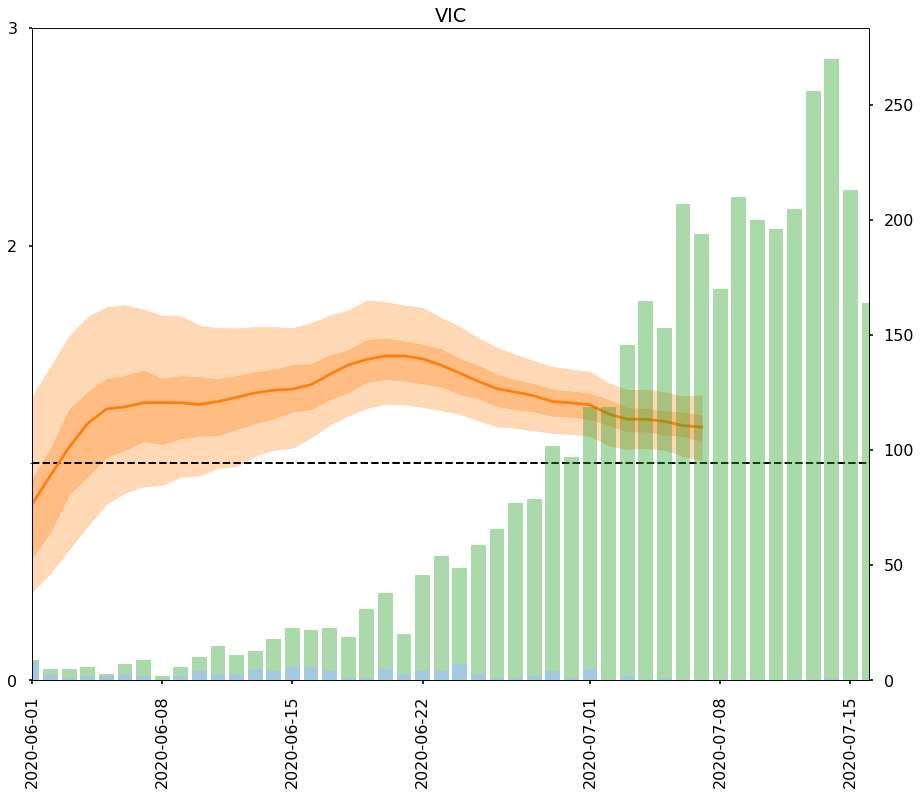

In [66]:
fig, ax = plt.subplots(figsize=(15,12))

date_filter = pd.date_range(start='2020-06-01',end='2020-07-16')
    
state = 'VIC'


#filters
df_state = df_cases.loc[(state)]

df_state = df_state.loc[date_filter[0]:date_filter[-1]]
#print(df_state.index)
#df_state.index = pd.DatetimeIndex(df_state.index)

#fill missing dates
#
#df_state.index = df_state.reindex(date_filter, fill_value=0)
df_state= df_state.asfreq('D')
df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-16')&(df_L_R.state==state)]
df = df_june.loc[(df_june.date.isin(date_filter))]


#plot new estimate
ax.plot(df.date, df['median'], label='June Reff',color='C1')
ax.fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
ax.fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
ax2 = ax.twinx()
ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4)
ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4)
#formatting
ax.set_title(state)


#grid line at R_eff =1
ax.set_yticks([1],minor=True,)
ax.set_yticks([0,2,3],minor=False)
ax.set_yticklabels([0,2,3],minor=False)
ax.yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
ax.set_ylim((0,3))
    
        

ax.tick_params(axis='x',rotation=90)
ax.set_xlim((date_filter[0],date_filter[-1]))
    
plt.show()

In [38]:
import pandas as pd
from datetime import timedelta

case_file_date=('13Jul','1155')
df_NNDSS = pd.read_excel("../data/COVID-19 UoM "+case_file_date[0]+"2020 "+case_file_date[1]+".xlsx",
                       parse_dates=['SPECIMEN_DATE','NOTIFICATION_DATE','NOTIFICATION_RECEIVE_DATE','TRUE_ONSET_DATE'],
                       dtype= {'PLACE_OF_ACQUISITION':str})

df = df_NNDSS.loc[df_NNDSS.STATE=='VIC']

#Set imported cases, local cases have 1101 as first 4 digits
df.PLACE_OF_ACQUISITION.fillna('00038888',inplace=True) #Fill blanks with simply unknown

df['date_inferred'] = df.TRUE_ONSET_DATE
df.loc[df.TRUE_ONSET_DATE.isna(),'date_inferred'] = df.loc[df.TRUE_ONSET_DATE.isna()].NOTIFICATION_DATE - timedelta(days=5)
df.loc[df.date_inferred.isna(),'date_inferred'] = df.loc[df.date_inferred.isna()].NOTIFICATION_RECEIVE_DATE - timedelta(days=1)

df['imported'] = df.PLACE_OF_ACQUISITION.apply(lambda x: 1 if x[-4:]=='8888' and x != '00038888' else 0)
df['local'] = 1 - df.imported
df = df.groupby(['date_inferred'])[['imported','local']].sum()


df.reset_index(inplace=True)
df['date'] = df.date_inferred.apply(lambda x: x.dayofyear) -pd.to_datetime('2020-03-01').dayofyear
df = df.sort_values(by='date')


df = df.set_index('date')

print(df.loc[123])


     date_inferred  imported  local
date                               
123     2020-07-02         0     98
123     2002-07-03         0      1


//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid